In [41]:
import pandas as pd
import numpy as np

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df = pd.read_csv("/content/drive/MyDrive/KJ Training Program/On-Campus-Labs/KJ_Zip/KJ Week-2/iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [44]:
df.shape

(150, 5)

In [45]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Describe only object type

In [46]:
df.describe(include="O")

,variety
count,150
unique,3
top,Versicolor
freq,50


In [47]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

Is Data balanced/unbalanced?

In [12]:
df.groupby("variety").size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

Correlation b/w features

In [13]:
df.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [14]:
X =df.drop('variety', axis=1) # axis=0 -> row and axis=1, -> column, 
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
Y=df[['variety']]
Y.head()

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


Import LabelEncoder from sklearn

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
from sklearn.model_selection import train_test_split

80% of the data used for training and rest 20% for testing.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=435435)

In [52]:
print("X_train size: ", X_train.shape, "y_test size:", y_train.shape,"\nX_test size: ", X_test.shape,"y_test size: ", y_test.shape)

X_train size:  (120, 4) y_test size: (120,) 
X_test size:  (30, 4) y_test size:  (30,)


Import KNeighbors Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#knn = KNeighborsClassifier(n_neighbors=3)

Lets find optimal( best fit) value for K by using elbow method 

In [55]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

In [59]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Error Rate')

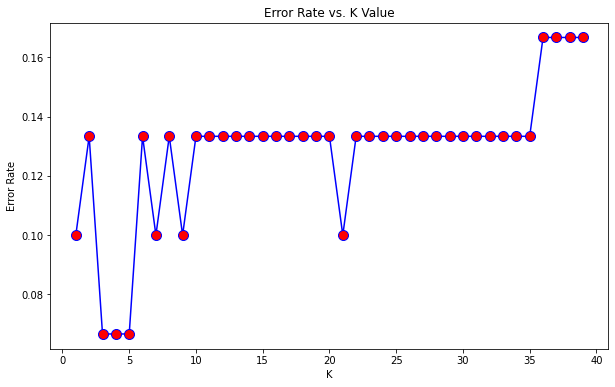

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle="solid", marker="o",
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)

In [70]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2,
       1, 0, 0, 2, 0, 1, 1, 2])

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score



In [73]:
type(df.iloc[0:,[1,2,3]][0:3])

pandas.core.frame.DataFrame

In [74]:
user_input = pd.DataFrame(np.array([6.1, 3.9, 1.8, 0.93]).reshape(-1,4), columns=["sepal.lengthse" ,"pal.width" , "petal.length", "petal.width"])

In [75]:
user_input

,sepal.lengthse,pal.width,petal.length,petal.width
0,6.1,3.9,1.8,0.93


In [76]:
knn.predict(user_input)

array([0])

In [77]:
knn.predict_proba(user_input)

array([[1., 0., 0.]])

In [78]:
accuracy_score(y_test, y_pred)*100

93.33333333333333

In [79]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  6,  0],
       [ 0,  2, 12]])

In [80]:
scores_list = []
for k in list(range(1, 20)):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores_list.append(scores.mean())

In [81]:
scores_list

[0.9666666666666666,
 0.9583333333333333,
 0.975,
 0.9499999999999998,
 0.9666666666666666,
 0.9666666666666666,
 0.9833333333333332,
 0.9666666666666666,
 0.9583333333333333,
 0.9666666666666666,
 0.975,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.95,
 0.95,
 0.95,
 0.95]